# Netflix Movies and TV Shows EDA using Python

Netflix is a popular entertainment service used by people around the world. This EDA will explore the Netflix dataset through visualizations and graphs using python libraries, matplotlib, and seaborn.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from datetime import date, timedelta
import seaborn as sns
%matplotlib inline

In [2]:
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_data.shape # (rows, columns)

(8807, 12)

In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix_data[netflix_data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


As we can see there no duplicated values in dataset.

In [6]:
netflix_data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot: >

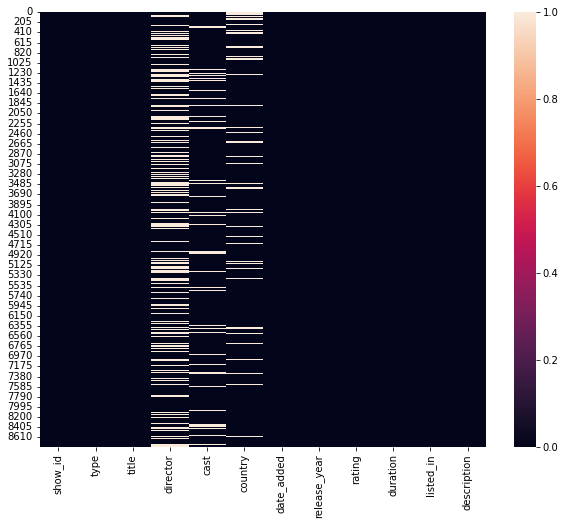

In [8]:
plt.figure(figsize= (10, 8))
sns.heatmap(netflix_data.isnull())

In [9]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
netflix_data["Date"] = pd.to_datetime(netflix_data["date_added"])
netflix_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24


# To check Type is Movie and listed in Comedies

In [13]:
comedy_movies= netflix_data[(netflix_data["type"] == "Movie") & (netflix_data["listed_in"] == "Comedies")]
comedy_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...,2021-09-01
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,"September 1, 2021",2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...,2021-09-01
342,s343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, M...",United States,"August 1, 2021",1995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders...,2021-08-01
348,s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States","August 1, 2021",2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ...",2021-08-01


# Different ratings define by netflix

In [14]:
netflix_data["rating"].nunique()

17

In [15]:
netflix_data["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

# Movies that got TV-14 rating in India

In [16]:
tv_14_rating= netflix_data[(netflix_data["type"] == "Movie") & (netflix_data["rating"] == "TV-14") & (netflix_data["country"] == "India")]
tv_14_rating.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,2021-09-05
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...,2021-09-02
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,"September 2, 2021",2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...,2021-09-02
126,s127,Movie,Shikara,Vidhu Vinod Chopra,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",India,"September 2, 2021",2020,TV-14,115 min,"Dramas, International Movies, Romantic Movies",A couple must strive to remain resilient after...,2021-09-02


# Maximum duration of Movie/TV Show

In [17]:
netflix_data["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [18]:
netflix_data[["Mintues", 'Unit']] = netflix_data["duration"].str.split(" ", expand = True)

In [19]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,Mintues,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,1,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2,Seasons


In [20]:
netflix_data["Mintues"] = netflix_data["Mintues"].astype(float)

In [21]:
netflix_data[["type","Mintues"]].max()

type       TV Show
Mintues      312.0
dtype: object

# Type "Movie" and listed_in "Dramas" OR Type "TV Show" and listed_in "Kids' TV"

In [22]:
Drama_movies_kids_TvShow= netflix_data[(netflix_data["type"] == "Movie") & (netflix_data["listed_in"] == "Dramas")| (netflix_data["type"] == "TV Show") & (netflix_data["listed_in"] == "Kids' TV")]
Drama_movies_kids_TvShow.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,Mintues,Unit
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,2021-09-17,1.0,Season
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021-09-16,3.0,Seasons
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021-09-15,6.0,Seasons
89,s90,TV Show,Mighty Raju,NaN,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",NaN,"September 9, 2021",2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan...",2021-09-09,4.0,Seasons
100,s101,TV Show,Tobot Galaxy Detectives,NaN,"Austin Abell, Travis Turner, Cole Howard, Anna...",NaN,"September 7, 2021",2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,2021-09-07,2.0,Seasons
111,s112,TV Show,Sharkdog,NaN,"Liam Mitchell, Dee Bradley Baker, Grey Griffin...","United States, Singapore","September 3, 2021",2021,TV-Y,1 Season,Kids' TV,"Half shark, half dog with a big heart and a be...",2021-09-03,1.0,Season
112,s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",NaN,"September 3, 2021",2021,PG-13,119 min,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ...",2021-09-03,119.0,min
123,s124,TV Show,Luv Kushh,NaN,NaN,NaN,"September 2, 2021",2012,TV-Y7,1 Season,Kids' TV,"Based on the last book of the epic Ramayana, t...",2021-09-02,1.0,Season
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...,2021-09-01,108.0,min
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...,2021-09-01,124.0,min


# To check in which Year highest number of Movies and TV Shows were released

In [23]:
year = netflix_data["release_year"].value_counts().reset_index().rename(columns = {"index": "Year", "release_year": "Count"})
year.head(10)

,Year,Count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
5,2021,592
6,2015,560
7,2014,352
8,2013,288
9,2012,237


<AxesSubplot: xlabel='Year', ylabel='Count'>

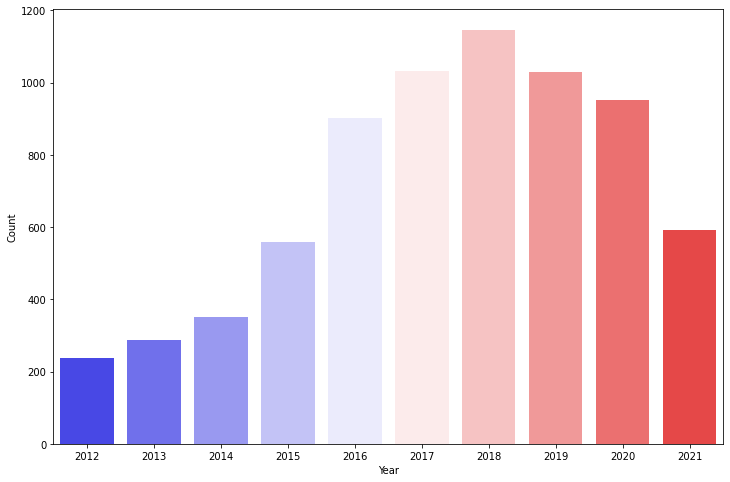

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(data = year[:10], x = "Year", y = "Count", palette= "bwr")

In 2018 highest number of tv shows were released.

# Number of Movies and Tv Shows in dataset

In [25]:
Movies_TVShows = netflix_data["type"].value_counts().reset_index().rename(columns = {"index": "Movies and TV shows", 
                                                                    "type": "Number of Movies and TV shows"})
Movies_TVShows

,Movies and TV shows,Number of Movies and TV shows
0,Movie,6131
1,TV Show,2676


<AxesSubplot: xlabel='Movies and TV shows', ylabel='Number of Movies and TV shows'>

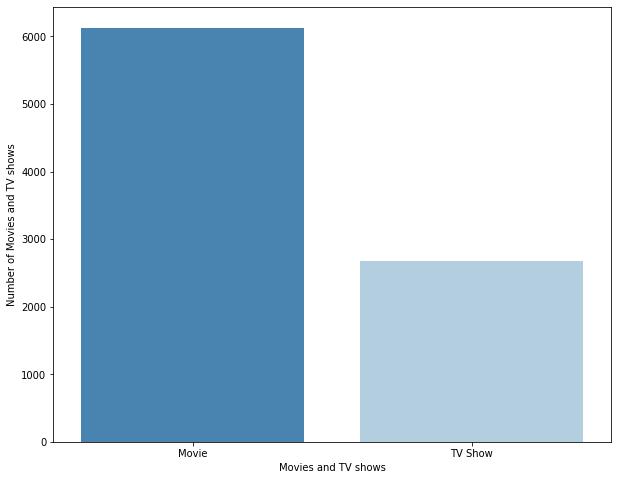

In [26]:
plt.figure(figsize=(10, 8))
sns.barplot(data = Movies_TVShows, x = "Movies and TV shows", y = "Number of Movies and TV shows", palette = "Blues_r")

The above plot shows us that the Movies are more and TV shows are less.

# Pie chart of Rating

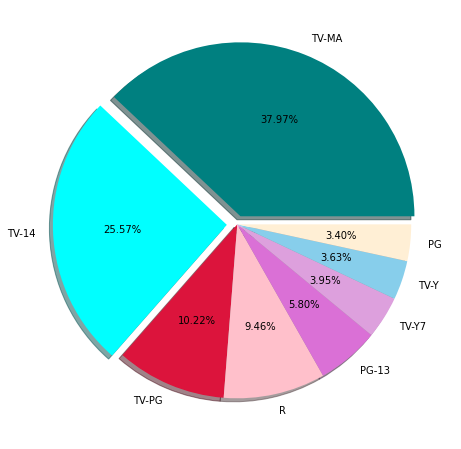

In [27]:
plt.figure(figsize=(10, 8))
colors = ["teal", "aqua", "crimson","pink", 
          "orchid", "plum", "skyblue", "papayawhip"]

rating_names = netflix_data.rating.value_counts().index
rating_values = netflix_data.rating.value_counts().values
        
plt.pie(rating_values[0:8], labels = rating_names[0:8], 
        autopct= "%1.2f%%", shadow= True, colors = colors,
        explode= [0.05, 0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
plt.show()

We can tell from the pie chart above that the majority of Netflix movies and TV Shows are geared toward mature audiences, with movies and episodes not suitable for children under 14 coming in second.

# Seperating Movies and TV Shows

In [28]:
movie = netflix_data[netflix_data["type"] == "Movie"]
tv_Shows = netflix_data[netflix_data["type"] == "TV Show"]

In [29]:
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,Mintues,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,90.0,min
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,91.0,min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,125.0,min
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,104.0,min
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,127.0,min


In [30]:
tv_Shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,Mintues,Unit
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2.0,Seasons
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,1.0,Season


# To Check Top 10 Countries highest number of Movies in netflix

In [31]:
country_movies = movie["country"].value_counts().reset_index().rename(columns= {"index": "Country", "country": "No. of Movies"})
country_movies.head(10)

,Country,No. of Movies
0,United States,2058
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Turkey,76
9,Japan,76


Text(0.5, 1.0, 'Top Countries - Movies')

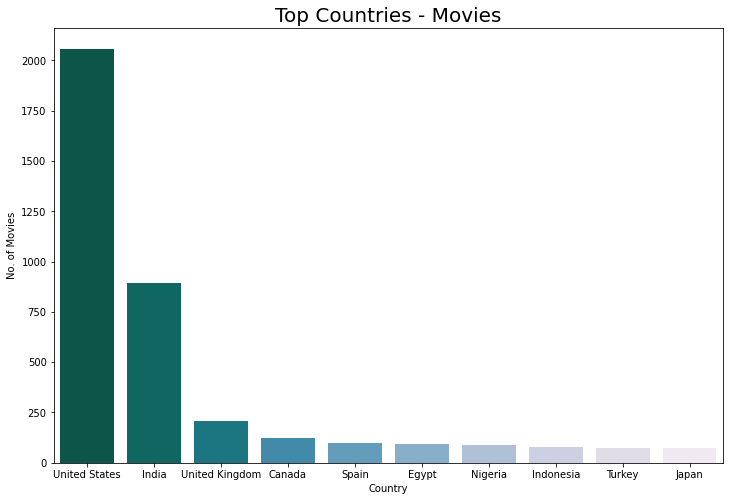

In [32]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)
sns.barplot(data= country_movies[:10], 
            x = "Country", y = "No. of Movies", palette= "PuBuGn_r").set_title("Top Countries - Movies", fontsize = 20)

From above graph we can observe that the top most country is the United States has the higher no. of movies and Second most country with higher no. of movies is India. And countries with lowest no. of movies are Turkey amd Japan. 

# To Check Top 10 Countries highest number TV Shows in netflix

In [33]:
country_TvShows = tv_Shows["country"].value_counts().reset_index().rename(columns = {"index": "Country", "country": "Number of TV Shows"})
country_TvShows.head(10)

,Country,Number of TV Shows
0,United States,760
1,United Kingdom,213
2,Japan,169
3,South Korea,158
4,India,79
5,Taiwan,68
6,Canada,59
7,France,49
8,Australia,48
9,Spain,48


Text(0.5, 1.0, 'Top Countries - TV Shows')

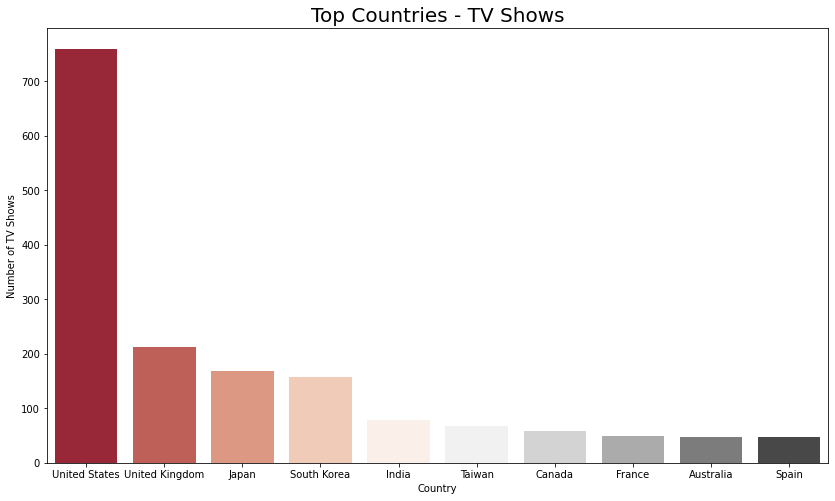

In [34]:
matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.barplot(data= country_TvShows[:10], 
            x = "Country", y = "Number of TV Shows", palette= "RdGy").set_title("Top Countries - TV Shows", fontsize = 20)

Above graph shows us that the top most country is the United States with larger no. of TV shows. And countries with lowest no. of TV shows are France, Australia and Spain.

# Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix 

In [35]:
directors = netflix_data["director"].value_counts().reset_index().rename(columns = {"index": "Directors", "director": "Number of Movies/ TV Shows"})
directors.head(10)

,Directors,Number of Movies/ TV Shows
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


Text(0.5, 1.0, 'Top Directors')

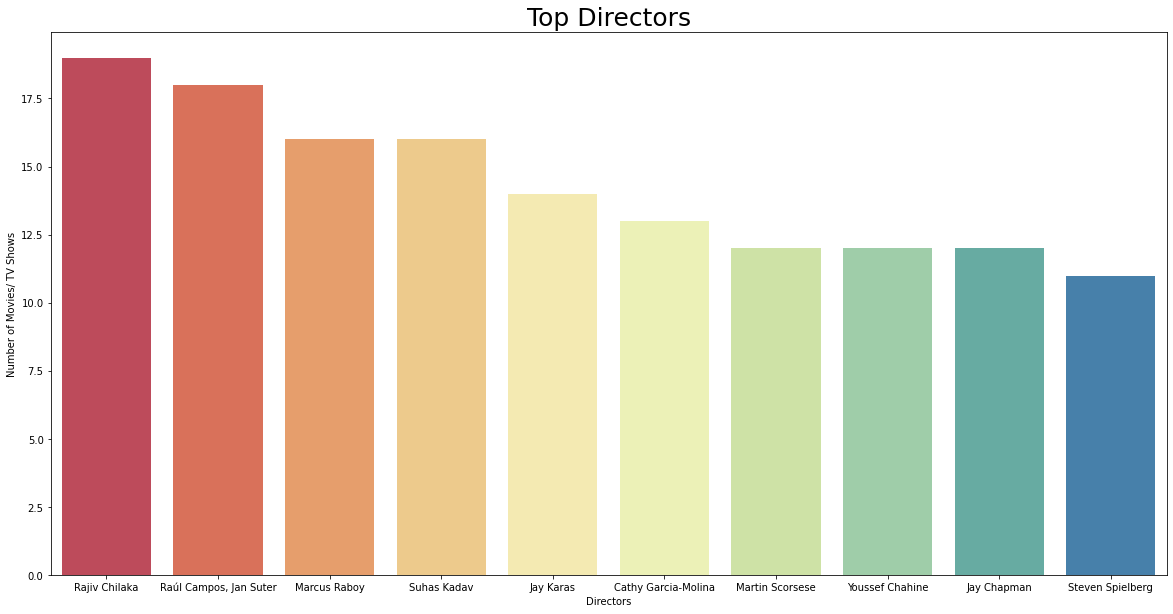

In [36]:
plt.figure(figsize= (20, 10))
sns.barplot(data = directors[:10], 
            x = "Directors", y = "Number of Movies/ TV Shows", palette = "Spectral").set_title("Top Directors", fontsize = 25)

In this above graph top directors are "Rajiv Chilaka", "Raúl Campos, Jan Suter" with 19 and 18 Number of Movies/ Tv Shows respectively.

# Conclusion: 

1. The most content type on Netflix is movies.


2. The country by the amount of the produces content is the United States.


3. The most popular director on Netflix, with the most titles, is Rajiv Chilaka.


4. The largest count of Netflix content is made with a "TV-MA" rating, and "TV_14".


5. Most of the movies released in 2018.